### Лаба 5.5

In [666]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [667]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 

In [668]:
def prepare_plot(name_x, name_y):
    fig, ax = plt.subplots(figsize = (10, 8))
    ax.minorticks_on()
    ax.grid(which = 'major')
    ax.grid(which = 'minor', linestyle = ':')
    ax.set_ylabel(name_y)
    ax.set_xlabel(name_x)
    return ax

def max_sigma(y, ya):
    if (len(y) != len(ya)):
        print("ERROR! func max_sigma, len(y) != len(ya)\n")
        return
    max_sigma = 0.0
    i = 0
    for elem in y:
        if (abs(elem - ya[i]) > max_sigma):
            max_sigma = abs(elem - ya[i])
    return max_sigma

def max_delta_x(x):
    return max(x) - min(x)

def drow_line(ax_cur, x, y, x_err=0, y_err=0, line_color="red"):
    ax_cur.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', color=line_color)
    p = np.polyfit(x, y, 1)
    ya = np.polyval(p, x)
    df_local = pd.DataFrame()
    df_local['x'] = x
    df_local['ya'] = ya
    df_local.sort_values(by=['x'])
    ax_cur.plot(df_local['x'], df_local['ya'], linestyle='dashed', color=line_color)
    k = (ya[1] - ya[0]) / (x[1] - x[0])
    delta_k = 12 ** 0.5 * max_sigma(y, ya) / max_delta_x(x) / len(x) ** 2
    print("k =", k, '(' + line_color + ')')
    print("delta k =", delta_k) 

##### 1) Построить калибровочный график (зная энергию для кобальта, натрия и цезия)

k = 0.0007654140407206761 (blue)
delta k = 0.00013377166179119344
0.0007654140407206764 -0.050545943103277244


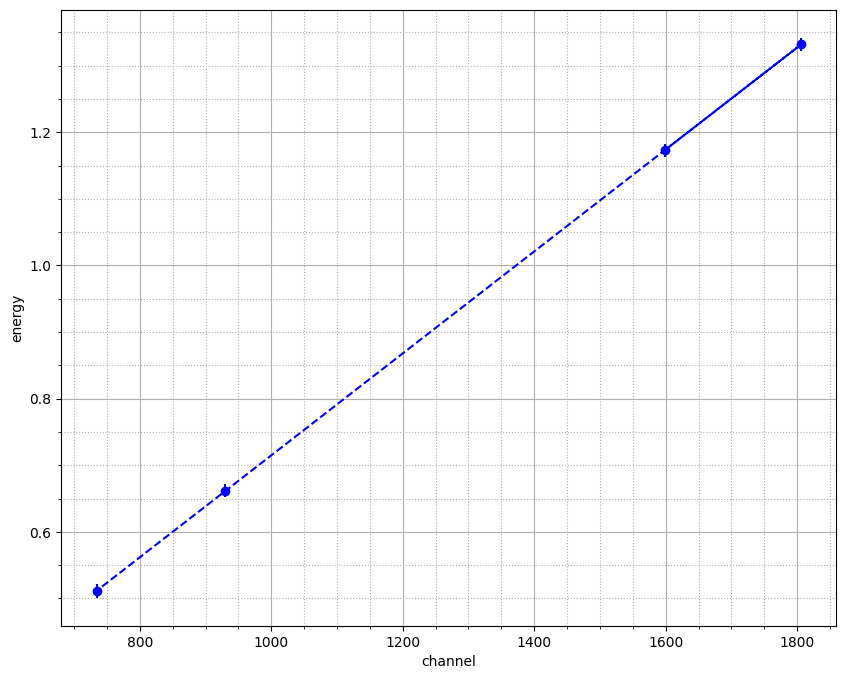

In [669]:
delta_y = [0.01, 0.01, 0.01, 0.01]

channel = [1599, 1806, 930, 734]
energy = [1.173, 1.332, .6617, .511]

ax1 = prepare_plot("channel", "energy")
drow_line(ax1, channel, energy, 0, delta_y, "blue")
a, b = np.polyfit(channel, energy, 1)
print(a, b)


Получаем формулу перехода от номера канала к энергии:

E = 0.7654140407206764 N - 50.54594310327729

In [670]:
data = pd.DataFrame()
data["Источник"] = ['Кобальт', 'Кобальт', 'Цезий', 'Натрий', 'Натрий', 'Европий', 'Европий', 'Европий', 'Европий', 'Европий', 'Европий', 'Европий', 'Европий', 'Америтий', 'Америтий']
N = [1599, 1806, 930, 734, 1744, 1902, 1501, 1329, 1083, 515, 386, 289, 229, 146, 99]
data['Ni'] = N
delta_Ni = [80.84, 89.71, 61.26, 51.19, 56.43, 95.63, 113.69, 59.13, 62.96, 38.09, 30.63, 23.73, 16.36, 9.85, 12.52]
data['delta_Ni'] = delta_Ni

Ei = []
for value in N:
    Ei_new = a * value + b
    Ei.append(Ei_new)
data['Ei, MeV'] = Ei

delta_Ei = []
for delta in delta_Ni:
    new_delta = a * delta + b
    delta_Ei.append(math.fabs(new_delta))
data['delta_Ei, MeV'] = delta_Ei

Ri = []
for d_, d in zip(delta_Ei, Ei):
    Ri.append(d_ / d)
data['Ri'] = Ri

data

,Источник,Ni,delta_Ni,"Ei, MeV","delta_Ei, MeV",Ri
0,Кобальт,1599,80.84,1.173351,0.011330,0.009656
1,Кобальт,1806,89.71,1.331792,0.018119,0.013605
2,Цезий,930,61.26,0.661289,0.003657,0.005530
3,Натрий,734,51.19,0.511268,0.011364,0.022228
4,Натрий,1744,56.43,1.284336,0.007354,0.005726
5,Европий,1902,95.63,1.405272,0.022651,0.016118
6,Европий,1501,113.69,1.098341,0.036474,0.033208
7,Европий,1329,59.13,0.966689,0.005287,0.005469
8,Европий,1083,62.96,0.778397,0.002355,0.003026
9,Европий,515,38.09,0.343642,0.021391,0.062249


#### 2) Сравнение экспериментального и теоретического значения энергии комптоновского края

k = 0.9902891002612505 (blue)
delta k = 0.28466591915000355


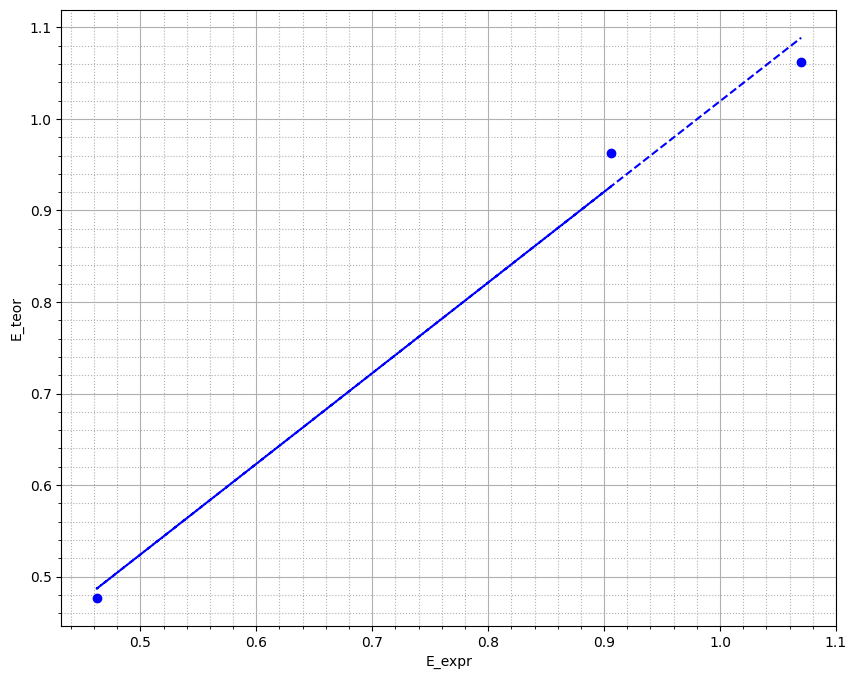

In [671]:
data2 = pd.DataFrame()
data2['Источник'] = ['Кобальт', 'Цезий', 'Натрий']
ch = [1250, 670, 1464]
E_expr = []

for val in ch:
    E_expr_new = a*val + b
    E_expr.append(E_expr_new)
E_teor = [0.963, 0.477, 1.062]
data2['E_expr'] = E_expr
data2['E_teor'] = E_teor
data2
# delta_E = [30, 20, 30]
ax2 = prepare_plot("E_expr", "E_teor")
drow_line(ax2, E_expr, E_teor, 0, 0, "blue")

#### 3) Проверка зависимости Ri^2 = const/Ei

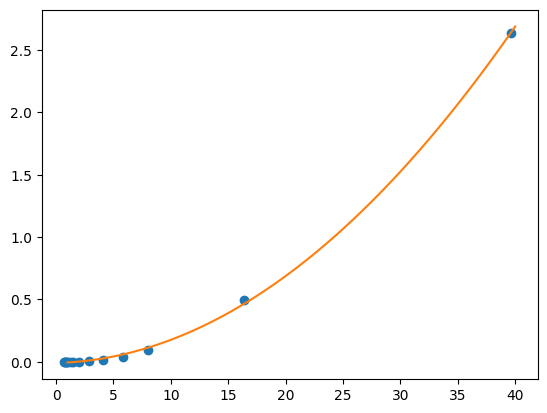

,Ri^2,1/Ei
0,0.000093,0.852260
1,0.000185,0.750868
2,0.000031,1.512198
3,0.000494,1.955921
4,0.000033,0.778612
5,0.000260,0.711606
6,0.001103,0.910464
7,0.000030,1.034459
8,0.000009,1.284691
9,0.003875,2.910003


In [672]:
Ri_squared = []
for i in Ri:
    squared = i**2
    Ri_squared.append(squared)

data3 = pd.DataFrame()
data3['Ri^2'] = Ri_squared

Ei_div_1 = []
for div in Ei:
    new = 1/div
    Ei_div_1.append(new)

data3['1/Ei'] = Ei_div_1

z = np.polyfit(Ei_div_1, Ri_squared, 2)
p = np.poly1d(z)

xp = np.linspace(1, 40, 100)
plt.plot(Ei_div_1, Ri_squared, 'o', xp, p(xp), '-')
plt.show()
# ax3 = prepare_plot("1/Ei", "Ri^2")
# drow_line(ax3, Ei_div_1, Ri_squared, 0, 0, "blue")
data3

#### 4) График зависимости энергии пика обратного рассеяния от энергии фотопика

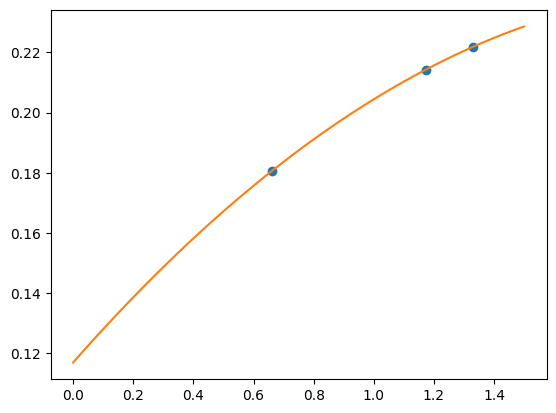

,E_expr_obr,E_teor_ob
0,0.214287,0.209
1,0.221941,0.214
2,0.180609,0.184


In [673]:
N_4 = [346, 356, 302]
E_ex_ob = []
for i in N_4:
    new = a*i + b
    E_ex_ob.append(new)
    
data4 = pd.DataFrame()
data4['E_expr_obr'] = E_ex_ob
E_teor_ob = [0.209, 0.214, 0.184]
data4['E_teor_ob'] = E_teor_ob

E = [1.173351, 1.331792, 0.661289]

z = np.polyfit(E, E_ex_ob, 2)
p = np.poly1d(z)

xp = np.linspace(0, 1.5, 100)
plt.plot(E, E_ex_ob, 'o', xp, p(xp), '-')
plt.show()
# ax3 = prepare_plot("E", "E_ex_ob")
# drow_line(ax3, E, E_teor_ob, 0, 0, "blue")
data4